### 라이브러리 호출
Pandas는 두 글자로 줄인 "pd"로 사용

> **import** pandas **as** pd

In [1]:
import pandas as pd

### Pandas 객체
NumPy 배열 기반으로 만들어진 Series와 DataFrame이 있다. 해당 객체는 NumPy 배열 객체의 다양한 메서드를 일부 사용할 수 있다. 파이썬의 기본 객체 및 NumPy의 객체와 다르게 index를 명시적으로 볼 수 있다.  
객체 색인을 위해서 indexer(.iloc\[\], .loc\[\])를 사용할 수 있으며 이는 보다 빠른 연산 속도를 보장한다.  
* .iloc\[\]: 정수 기반 인덱싱
* .loc\[\]: index의 값(문자 숫자 모두 가능) 또는 조건식

### Pandas 객체 - Series
1차원 객체로 index와 value로 구성되어 있다. 대괄호를 사용하여 내부 원소에 접근이 가능하며 indexer(.iloc\[\], .loc\[\])도 사용 가능.

* 생성  
Series() 함수와 1차원 배열을 사용. 딕셔너리로 생성이 가능하긴 하나 인덱스 지정은 Series() 함수의 index 인자 활용 권장.

* 조작  
기본적으로 NumPy배열의 조작과 같으며 indexer의 용법이 추가됨.

In [2]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [3]:
pd.Series([1, 2, 3], index = ["a", "b", "c"])

a    1
b    2
c    3
dtype: int64

In [4]:
ser1 = pd.Series([100, 200, 300, 300])

In [5]:
len(ser1), ser1.shape, ser1.index, ser1.values, ser1.dtype

(4,
 (4,),
 RangeIndex(start=0, stop=4, step=1),
 array([100, 200, 300, 300], dtype=int64),
 dtype('int64'))

In [6]:
ser1.sum(), ser1.mean(), ser1.max(), ser1.min(), ser1.std(), ser1.var()

(900, 225.0, 300, 100, 95.74271077563381, 9166.666666666666)

In [7]:
# .idxmax()와 .idxmin()의 경우 해당 조건의 첫 번째 원소의 인덱스를 반환
ser1.skew(), ser1.kurt(), ser1.idxmax(), ser1.idxmin()

(-0.8545630383279712, -1.2892561983471076, 2, 0)

In [8]:
ser1.median(), ser1.quantile(0.5), ser1.quantile([0, 0.25, 0.5, 0.75, 1])

(250.0,
 250.0,
 0.00    100.0
 0.25    175.0
 0.50    250.0
 0.75    300.0
 1.00    300.0
 dtype: float64)

In [9]:
ser1.unique(), ser1.nunique()

(array([100, 200, 300], dtype=int64), 3)

In [10]:
ser1.astype("str") # int, float, str

0    100
1    200
2    300
3    300
dtype: object

<AxesSubplot:>

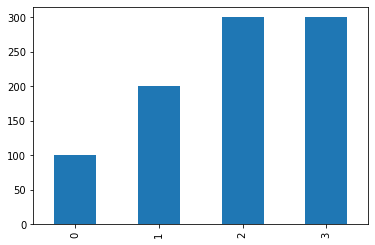

In [11]:
ser1.plot.bar()

### Pandas 객체 - DataFrame
2차원 객체로 index와 value로 구성되어 있다. 대괄호를 사용하여 내부 원소에 접근이 가능하며 indexer(.iloc\[\], .loc\[\])도 사용 가능.

* 생성  
DataFrame() 함수와 2차원 배열을 사용. 딕셔너리 기반 생성도 가능. 각 변수의 원소 개수는 같아야 한다.

* 조작  
기본적으로 2차원 NumPy배열의 조작과 같으며 indexer의 용법이 추가됨.
한 줄의 row 또는 column만 뽑는 경우 리스트를 사용하지 않으면 Series로 객체
성격이 바뀜

In [12]:
pd.DataFrame({"col1": [11, 22, 33],
              "col2": [77, 88, 99]})

,col1,col2
0,11,77
1,22,88
2,33,99


In [13]:
pd.DataFrame({"col1": [11, 22, 33],
              "col2": [77, 88]})

ValueError: All arrays must be of the same length

In [14]:
pd.DataFrame([[11, 22, 33],
              [77, 88, 99]],
             columns = ["a", "b", "c"])

,a,b,c
0,11,22,33
1,77,88,99


In [15]:
# pd.DataFrame({"a": 1, "b": 2}) # Error!!
pd.DataFrame({"a": [1], "b": [2]})

,a,b
0,1,2


In [16]:
pd.DataFrame([[1, 2]], columns = ["a", "b"])

,a,b
0,1,2


In [17]:
df = pd.DataFrame({"col1": [11, 22, 33],
                   "col2": [77, 88, 99],
                   "col3": [100, 200, 300]})
df

,col1,col2,col3
0,11,77,100
1,22,88,200
2,33,99,300


In [18]:
len(df), df.shape

(3, (3, 3))

In [19]:
df.dtypes

col1    int64
col2    int64
col3    int64
dtype: object

In [20]:
df.index, df.columns

(RangeIndex(start=0, stop=3, step=1),
 Index(['col1', 'col2', 'col3'], dtype='object'))

In [21]:
df.index.to_list(), df.columns.to_list()

([0, 1, 2], ['col1', 'col2', 'col3'])

In [22]:
df.values

array([[ 11,  77, 100],
       [ 22,  88, 200],
       [ 33,  99, 300]], dtype=int64)

In [23]:
df["col1"] # Series

0    11
1    22
2    33
Name: col1, dtype: int64

In [24]:
df[["col1"]] # DataFrame

,col1
0,11
1,22
2,33


In [25]:
df[["col1", "col2"]]

,col1,col2
0,11,77
1,22,88
2,33,99


In [26]:
df["col1"][2], df["col1"][:2]

(33,
 0    11
 1    22
 Name: col1, dtype: int64)

In [27]:
df.iloc[0, 0], df.iloc[1, 0], df.iloc[0, 2]

(11, 22, 100)

In [28]:
df.iloc[[0], [0]]

,col1
0,11


In [29]:
df.iloc[:2, 0]

0    11
1    22
Name: col1, dtype: int64

In [30]:
df.iloc[:2, [0]]

,col1
0,11
1,22


In [31]:
df.iloc[0, :2]

col1    11
col2    77
Name: 0, dtype: int64

In [32]:
df.iloc[[0], :2]

,col1,col2
0,11,77


In [33]:
df.iloc[0, [0, 2]]

col1     11
col3    100
Name: 0, dtype: int64

In [34]:
df.iloc[[0, 2], 0]

0    11
2    33
Name: col1, dtype: int64

In [35]:
df

,col1,col2,col3
0,11,77,100
1,22,88,200
2,33,99,300


In [36]:
df.loc[0, ] # row index가 숫자이면서 0이 존재하기에 가능

col1     11
col2     77
col3    100
Name: 0, dtype: int64

In [37]:
df.loc[:1, ] # .loc[] 에서 인덱스 기반의 범위 연산은 마지막을 생략하지 않음

,col1,col2,col3
0,11,77,100
1,22,88,200


In [38]:
df.loc[:, "col1"]

0    11
1    22
2    33
Name: col1, dtype: int64

In [39]:
df.loc[:, ["col1"]]

,col1
0,11
1,22
2,33


In [40]:
df.loc[:, "col2":]

,col2,col3
0,77,100
1,88,200
2,99,300


In [41]:
df.loc[:, :"col2"]

,col1,col2
0,11,77
1,22,88
2,33,99


In [42]:
df["col1"] == 22

0    False
1     True
2    False
Name: col1, dtype: bool

In [43]:
df.loc[df["col1"] == 22, ]

,col1,col2,col3
1,22,88,200


In [44]:
df.loc[df["col3"] >= 200, ]

,col1,col2,col3
1,22,88,200
2,33,99,300


In [45]:
# (A 조건) & (B 조건) --> A조건과 B조건을 동시에(모두) 만족
df.loc[(df["col1"] == 22) & (df["col3"] >= 200), ]

,col1,col2,col3
1,22,88,200


In [46]:
pd.DataFrame(dict(c1 = df["col1"] == 22, 
                  c2 = df["col3"] >= 200,
                  cf = (df["col1"] == 22) & (df["col3"] >= 200)))

,c1,c2,cf
0,False,False,False
1,True,True,True
2,False,True,False


In [47]:
# (A 조건) | (B 조건) --> A조건 또는 B조건을 만족
df.loc[(df["col1"] == 11) | (df["col1"] >= 33), ]

,col1,col2,col3
0,11,77,100
2,33,99,300


In [48]:
pd.DataFrame(dict(c1 = df["col1"] == 11, 
                  c2 = df["col1"] >= 33,
                  cf = (df["col1"] == 11) | (df["col1"] == 33)))

,c1,c2,cf
0,True,False,True
1,False,False,False
2,False,True,True


In [49]:
df.loc[df["col1"].isin([11, 33]), ] # 위 코드의 결과와 같음

,col1,col2,col3
0,11,77,100
2,33,99,300


In [50]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [51]:
df = df.rename(columns = {"col1": "v1", "col2": "v2"})
df

,v1,v2,col3
0,11,77,100
1,22,88,200
2,33,99,300


In [52]:
# 이 방법은 column 개수와 같은 숫자의 원소가 있는 단순 리스트 필요
df.columns = ["c1", "c2", "c3"]
df

,c1,c2,c3
0,11,77,100
1,22,88,200
2,33,99,300


In [53]:
df["new1"] = 1
df["new2"] = df["c1"] * 5
df["new3"] = df["c2"] * df["c3"]
df

,c1,c2,c3,new1,new2,new3
0,11,77,100,1,55,7700
1,22,88,200,1,110,17600
2,33,99,300,1,165,29700


In [54]:
# 기존에 없는 변수명의 경우 가장 마지막에 신규 변수가 위치하게 되고,
# 기존에 있는 변수명의 경우 해당 변수의 값을 치환한다.
df["new3"] = [1, 2, 3] 
df

,c1,c2,c3,new1,new2,new3
0,11,77,100,1,55,1
1,22,88,200,1,110,2
2,33,99,300,1,165,3


In [55]:
df2 = df.iloc[:, [5, 0, 1, 2, 3, 4]] # 변수 순서 변경 가능
df2

,new3,c1,c2,c3,new1,new2
0,1,11,77,100,1,55
1,2,22,88,200,1,110
2,3,33,99,300,1,165


In [56]:
df2 = df2.drop("new1", axis = 1)
df2

,new3,c1,c2,c3,new2
0,1,11,77,100,55
1,2,22,88,200,110
2,3,33,99,300,165


In [57]:
df2 = df2.drop(["c1", "c2"], axis = 1)
df2

,new3,c3,new2
0,1,100,55
1,2,200,110
2,3,300,165


### 값의 대치 또는 치환

In [61]:
df2.iloc[0, 0] = 999
df2.iloc[1, 1:3] = 999
df2

,new3,c3,new2
0,999,100,55
1,2,999,999
2,3,300,165


In [62]:
df2.loc[1, "new3"] = 777
df2

,new3,c3,new2
0,999,100,55
1,777,999,999
2,3,300,165


In [63]:
df2 = df2.replace({999: 5555})
df2

,new3,c3,new2
0,5555,100,55
1,777,5555,5555
2,3,300,165


.replace() 메서드의 경우 dictionary를 기반으로 값을 치환할 수 있으며 dictionary의 키는 기존의 값에 대응되고 dictionary의 키의 값은 치환할 값에 대응된다.

In [64]:
df3 = df2.replace({5555: -1, 100: -999})
df3

,new3,c3,new2
0,-1,-999,55
1,777,-1,-1
2,3,300,165


In [65]:
import numpy as np

In [66]:
df3["new3"] = np.where(df3["new3"] == 777, 1, 0) # 조건이 True면 1, False면 0
df3["c3"] = np.where(df3["c3"] < 0, 0, df3["c3"]) # 음수인 경우만 특정 값으로 치환
df3

,new3,c3,new2
0,0,0,55
1,1,0,-1
2,0,300,165


1 또는 0의 이진 변수(binary variable)로 변환하는 경우 True/False가 숫자로 1과 0으로 취급되는 성질을 활용할 수 있다. True/False는 수치연산을 실행할 경우 자동으로 정수형으로 바뀌는데 여기서 합 또는 곱의 항등원 성질을 응용하여 다음과 같이 코드를 작성 할 수 있다.
$$ a + 0 = a $$
$$ a \times 1 = a $$

In [70]:
df3["new4"] = (df3["new2"] == 55) + 0
df3["new5"] = (df3["new2"] == 55) * 1
df3["new6"] = (df3["new2"] == 55).astype("int")
df3

,new3,c3,new2,new4,new5,new6
0,0,0,55,1,1,1
1,1,0,-1,0,0,0
2,0,300,165,0,0,0
